### Airline Delays

The U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics (BTS) tracks the on-time performance of domestic flights operated by large air carriers. Summary information on the number of on-time, delayed, canceled and diverted flights appears in DOT's monthly Air Travel Consumer Report, published about 30 days after the month's end, as well as in summary tables posted on this website. BTS began collecting details on the causes of flight delays in June 2003. Summary statistics and raw data are made available to the public at the time the Air Travel Consumer Report is relea

### Data Cleaning

In [2]:
import pandas as pd
import numpy as np


In [3]:
airlines= pd.read_csv('/Users/sarahpierre-louis/Downloads/airlinedelaycauses_DelayedFlights.csv')

In [4]:
airlines.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [5]:
airlines.dtypes

Unnamed: 0             int64
Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

In [6]:
airlines.shape

(1936758, 30)

In [7]:
airlines.isna().sum()

Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

In [8]:
#https://www.transtats.bts.gov/Fields.asp?Table_ID=236 
#for the explanation of the columns

CRSDepTime = Computerized Departure Time
CRSArrTime =

TaxiIn time = the period between the Actual Landing Time (ALDT) and the Actual In-Block Time (AIBT)
TaxiOut time = the period between the Actual Off-Block Time (AOBT) and the Actual Take Off Time (ATOT)


<b>"departure time"</b> is when the aircraft door will be closed in preparation for departure. 
The aircraft itself might sit at the gate for several minutes longer (at a minimum) 
while the pilots wait for their clearance to come through.

On the schedule, <b>"arrival time" </b>will be when the aircraft door is opened at the destination. 
Your aircraft might land ten, fifteen, or in extreme cases twenty minutes or more before this time. 
However, it still has to make its way from the landing runway to the terminal, 
and that can take a considerable amount of time at big, busy airports.

<b>A flight is counted as "on time" </b>if it operated less than 15 minutes later the scheduled time shown in the carriers' Computerized Reservations Systems (CRS). 
Arrival performance is based on arrival at the gate. 
Departure performance is based on departure from the gate."

In [9]:
airlines.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
airlines.Year.value_counts()

2008    1936758
Name: Year, dtype: int64

In [11]:
airlines.drop('Year', axis=1, inplace=True)

In [12]:
airlines.CancellationCode.value_counts()/ airlines.shape[0]

N    0.999673
B    0.000159
A    0.000127
C    0.000041
Name: CancellationCode, dtype: float64

In [13]:
airlines.drop('CancellationCode', axis=1, inplace=True)

In [14]:
airlines.Cancelled.value_counts()/airlines.shape[0]

0    0.999673
1    0.000327
Name: Cancelled, dtype: float64

In [15]:
airlines.drop('Cancelled', axis=1, inplace=True)

In [16]:
airlines.Diverted.value_counts()/airlines.shape[0]

0    0.995996
1    0.004004
Name: Diverted, dtype: float64

In [17]:
airlines.drop('Diverted', axis=1, inplace=True)

In [18]:
airlines.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,...,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,...,IAD,TPA,810,4.0,8.0,NaN,NaN,NaN,NaN,NaN
1,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,...,IAD,TPA,810,5.0,10.0,NaN,NaN,NaN,NaN,NaN
2,1,3,4,628.0,620,804.0,750,WN,448,N428WN,...,IND,BWI,515,3.0,17.0,NaN,NaN,NaN,NaN,NaN
3,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,...,IND,BWI,515,3.0,10.0,2.0,0.0,0.0,0.0,32.0
4,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,...,IND,JAX,688,4.0,10.0,NaN,NaN,NaN,NaN,NaN


In [19]:
airlines.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime',
       'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay'],
      dtype='object')

In [20]:
airlines.UniqueCarrier.value_counts()

WN    377602
AA    191865
MQ    141920
UA    141426
OO    132433
DL    114238
XE    103663
CO    100195
US     98425
EV     81877
NW     79108
FL     71284
YV     67063
B6     55315
OH     52657
9E     51885
AS     39293
F9     28269
HA      7490
AQ       750
Name: UniqueCarrier, dtype: int64

In [21]:
airlines.CarrierDelay.isna().sum()/airlines.shape[0]

0.3558885518996178

In [22]:
airlines.WeatherDelay.isna().sum()/airlines.shape[0]

0.3558885518996178

In [23]:
airlines[['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay','LateAircraftDelay']]= airlines[['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay','LateAircraftDelay']].fillna(0)

In [24]:
airlines.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,...,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,...,IAD,TPA,810,4.0,8.0,0.0,0.0,0.0,0.0,0.0
1,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,...,IAD,TPA,810,5.0,10.0,0.0,0.0,0.0,0.0,0.0
2,1,3,4,628.0,620,804.0,750,WN,448,N428WN,...,IND,BWI,515,3.0,17.0,0.0,0.0,0.0,0.0,0.0
3,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,...,IND,BWI,515,3.0,10.0,2.0,0.0,0.0,0.0,32.0
4,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,...,IND,JAX,688,4.0,10.0,0.0,0.0,0.0,0.0,0.0


In [25]:
airlines.drop(columns=['DepTime','CRSDepTime','ArrTime','CRSArrTime'], axis=1, inplace=True)

In [26]:
airlines.head()

,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,...,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1,3,4,WN,335,N712SW,128.0,150.0,116.0,-14.0,...,IAD,TPA,810,4.0,8.0,0.0,0.0,0.0,0.0,0.0
1,1,3,4,WN,3231,N772SW,128.0,145.0,113.0,2.0,...,IAD,TPA,810,5.0,10.0,0.0,0.0,0.0,0.0,0.0
2,1,3,4,WN,448,N428WN,96.0,90.0,76.0,14.0,...,IND,BWI,515,3.0,17.0,0.0,0.0,0.0,0.0,0.0
3,1,3,4,WN,3920,N464WN,90.0,90.0,77.0,34.0,...,IND,BWI,515,3.0,10.0,2.0,0.0,0.0,0.0,32.0
4,1,3,4,WN,378,N726SW,101.0,115.0,87.0,11.0,...,IND,JAX,688,4.0,10.0,0.0,0.0,0.0,0.0,0.0


In [27]:
airlines.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay'],
      dtype='object')

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

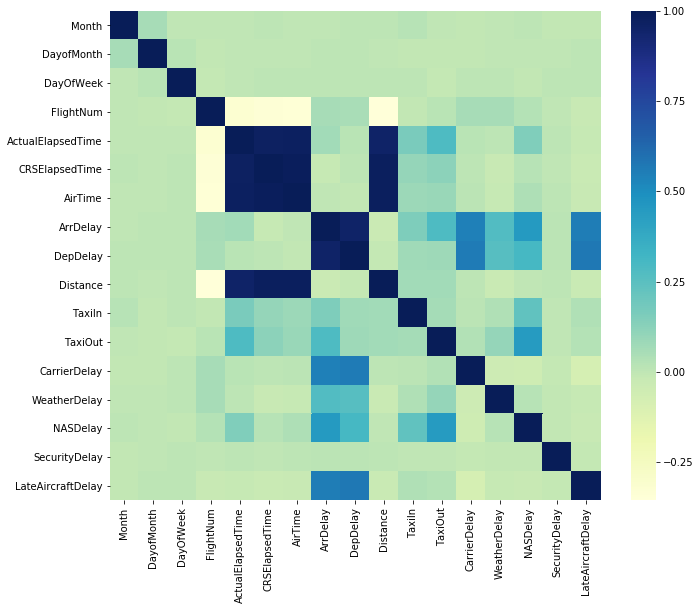

In [30]:
import numpy as np

corr = airlines.corr()

f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(corr, ax=ax, cmap="YlGnBu")

In [ ]:
High correlation between departure delays and arrival delays on a number of the variables so the lateness revolved around the departure. 
Any sort of departure delay metric is generally highly correlated with arrival delay. 
Possible explanation: flights get delayed arriving to the airport, they are going to set off a cascading effect where the flights are also delayed heading out. 

In [120]:
airlines.dropna().head()

,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,...,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Cluster,labels
0,1,3,4,WN,335,N712SW,128.0,150.0,116.0,-14.0,...,810,4.0,8.0,0.0,0.0,0.0,0.0,0.0,1,0
1,1,3,4,WN,3231,N772SW,128.0,145.0,113.0,2.0,...,810,5.0,10.0,0.0,0.0,0.0,0.0,0.0,1,0
2,1,3,4,WN,448,N428WN,96.0,90.0,76.0,14.0,...,515,3.0,17.0,0.0,0.0,0.0,0.0,0.0,1,0
3,1,3,4,WN,3920,N464WN,90.0,90.0,77.0,34.0,...,515,3.0,10.0,2.0,0.0,0.0,0.0,32.0,1,0
4,1,3,4,WN,378,N726SW,101.0,115.0,87.0,11.0,...,688,4.0,10.0,0.0,0.0,0.0,0.0,0.0,1,0


In [33]:
airlines = airlines.dropna()

In [34]:
airlines.shape

(1928368, 21)

In [35]:
airlines = airlines[:30000]

In [36]:
airlines.shape

(30000, 21)

### PCA

Perfect example to use PCA because perfect correlation between many variables.
Example, almost perfect correlation between arrivals and departures, they are 2 columns but they explain the same variance in the data

In [70]:
#Standardization
from sklearn.preprocessing import StandardScaler
standards = StandardScaler()
airlines_std = standards.fit_transform(airlines._get_numeric_data())

In [124]:
df_pca=pca.fit_transform(airlines_std)

In [125]:
df_pca=pd.DataFrame(data=df_pca, columns=['pc1','pc2'])

In [126]:
df_pca.head()

,pc1,pc2
0,0.315062,-1.516045
1,0.321360,-1.080316
2,-0.878301,-0.966651
3,-0.967957,-0.112095
4,-0.465442,-0.919768


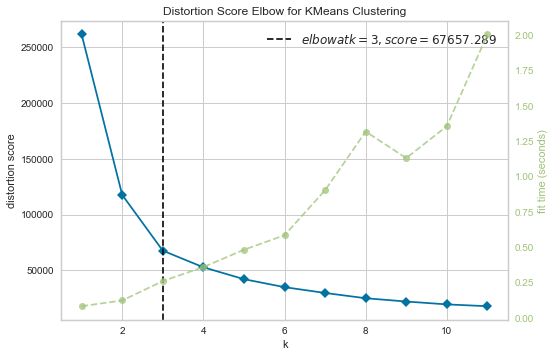

In [127]:
model=KMeans()
viz=KElbowVisualizer(model,k=(1,12))
viz.fit(df_pca)
viz.poof()

### KMEANS

In [132]:
model=KMeans(3)

In [133]:
model.fit(df_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [134]:
df1['cluster_pca_km']= model.fit_predict(df_pca)
df_pca['km_labels']=model.fit_predict(df_pca)

In [135]:
df1.cluster_pca_km.value_counts()

0    16236
1    10305
2     3459
Name: cluster_pca_km, dtype: int64

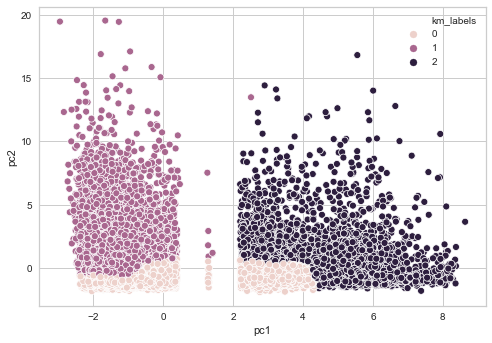

In [172]:
import seaborn as sns
sns.scatterplot(x='pc1',y='pc2', data=df_pca, hue='km_labels')

In [174]:
model=KMeans(2)

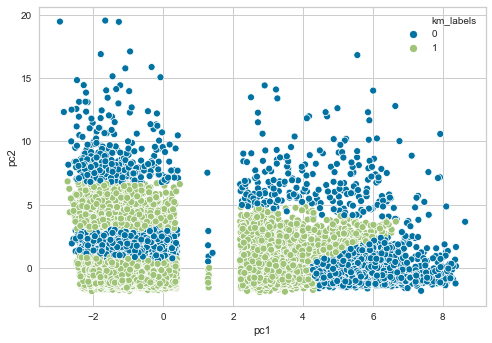

In [175]:
model.fit(df_pca)
df1['cluster_pca_km']= model.fit_predict(df_pca)
df_pca['km_labels']=model.fit_predict(df_pca)
import seaborn as sns
sns.scatterplot(x='pc1',y='pc2', data=df_pca, hue='km_labels')

### KMEANS - ideal number of clusters

In [75]:
from sklearn.cluster import KMeans

In [137]:
kmeans = KMeans(n_clusters=2)
airlines_clusters = kmeans.fit(df_pca)
y=kmeans.predict(df_pca)
score = silhouette_score(df_pca, y)
score

0.6063354230010919

In [138]:
kmeans = KMeans(n_clusters=3)
airlines_clusters = kmeans.fit(df_pca)
y=kmeans.predict(df_pca)
score = silhouette_score(df_pca, y)
score

0.6237421458559963

In [82]:
kmeans = KMeans(n_clusters=4)
airlines_clusters = kmeans.fit(df_pca)
y=kmeans.predict(df_pca)
score = silhouette_score(df_pca, y)
score

0.5326912731564696

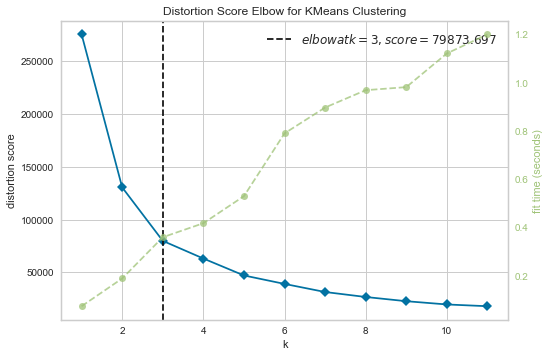

In [139]:
from yellowbrick.cluster import KElbowVisualizer

from sklearn.cluster import KMeans

model = KMeans()

visualizer = KElbowVisualizer(model, k=(1,12), metric='distortion')

visualizer.fit(df_pca)

visualizer.poof()

In [140]:
from yellowbrick.cluster import InterclusterDistance

### DBSCAN

In [145]:
from sklearn.cluster import DBSCAN

In [146]:
from sklearn.mixture import GaussianMixture

In [151]:
model=KMeans(3)

In [156]:
df_clustered = model.fit(df_pca)

In [158]:
df_pca['cluster_kmeans']=df_clustered.fit_predict(df_pca)

In [159]:
df_pca.cluster_kmeans.value_counts()

0     7947
4     6005
6     4399
3     3891
9     2936
10    2109
1     1105
2     1048
5      320
8      195
7       45
Name: cluster_kmeans, dtype: int64

In [160]:
from yellowbrick.cluster import InterclusterDistance

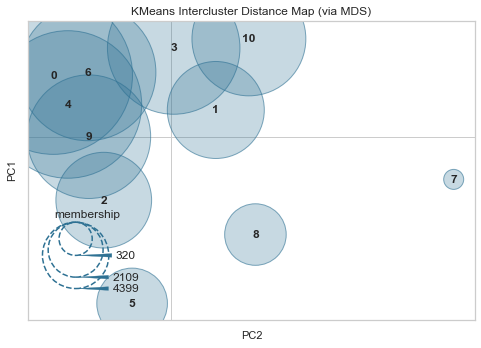

In [161]:
viz=InterclusterDistance(model)
viz.fit(df_pca.drop('cluster_kmeans', axis=1))
viz.poof()

In [ ]:
#the points are not densely populated enough to separate themselves from the main group


### Things to do :

- clustering by location
- Try agglomerative
- check the characteristics of each cluster